## Data visualization example

In a [recent blog post](https://www.allendowney.com/blog/2019/01/30/data-visualization-for-academics/), I showed figures from [a recent paper](https://osf.io/preprints/socarxiv/j2tw9/) and invited readers to redesign them to communicate their message more effectively.

This notebook shows one way we might redesign the figures.  At the same time, it demonstrates a simple use of a Pandas MultiIndex.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

The study reports the distribution of student evaluation scores for instructors under eight conditions.  At the top level, they report scores from evaluations with a 10-point of 6-points scale.

In [2]:
scale = ['10-point', '6-point']

At the next level, they distinguish fields of study as "least" or "most" male-dominated.

In [3]:
area = ['LeastMaleDominated', 'MostMaleDominated']

And they distinguish between male and female instructors.

In [4]:
instructor = ['Male', 'Female']

We can assemble those levels into a MultiIndex like this:

In [5]:
index = pd.MultiIndex.from_product([scale, area, instructor], 
                            names=['Scale', 'Area', 'Instructor'])
index

MultiIndex(levels=[['10-point', '6-point'], ['LeastMaleDominated', 'MostMaleDominated'], ['Female', 'Male']],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 1, 0, 0, 1, 1], [1, 0, 1, 0, 1, 0, 1, 0]],
           names=['Scale', 'Area', 'Instructor'])

For each of these eight conditions, the original paper reports the entire distribution of student evaluation scores.  To make a simpler and clearer visualization of the results, I am going to present a summary of these distributions.

I could take the mean of each distribution, and that would show the effect.  But to make it even clearer, I will use the fraction of "top" scores, meaning a 9 or 10 on the 10-point scale and a 6 on the 6-point scale. 

Now, to get the data, I used the figures from the paper and estimated numbers by eye.  **So these numbers are only approximate!**

In [6]:
data = [60, 60, 54, 38, 43, 42, 41, 41]
df = pd.DataFrame(data, columns=['TopScore%'], index=index)
df

TopScore%
Scale    Area               Instructor           
10-point LeastMaleDominated Male               60
                            Female             60
         MostMaleDominated  Male               54
                            Female             38
6-point  LeastMaleDominated Male               43
                            Female             42
         MostMaleDominated  Male               41
                            Female             41

To extract the subset of the data on a 10-point scale, we can use `loc` in the usual way.

In [7]:
df.loc['10-point']

TopScore%
Area               Instructor           
LeastMaleDominated Male               60
                   Female             60
MostMaleDominated  Male               54
                   Female             38

To extract subsets at other levels, we can use `xs`.  This example takes a cross-section of the second level.

In [8]:
df.xs('MostMaleDominated', level='Area')

TopScore%
Scale    Instructor           
10-point Male               54
         Female             38
6-point  Male               41
         Female             41

This example takes a cross-section of the third level.

In [9]:
df.xs('Male', level='Instructor')

TopScore%
Scale    Area                         
10-point LeastMaleDominated         60
         MostMaleDominated          54
6-point  LeastMaleDominated         43
         MostMaleDominated          41

Ok, now to think about presenting the data.  At the top level, the 10-point scale and the 6-point scale are different enough that I want to put them on different axes.  So I'll start by splitting the data at the top level.

In [10]:
ten = df.loc['10-point']
ten

TopScore%
Area               Instructor           
LeastMaleDominated Male               60
                   Female             60
MostMaleDominated  Male               54
                   Female             38

Now, the primary thing I want the reader to see is a discrepancy in percentages.  For comparison of two or more values, a bar plot is often a good choice.

As a starting place, I'll try the Pandas default for showing a bar plot of this data.

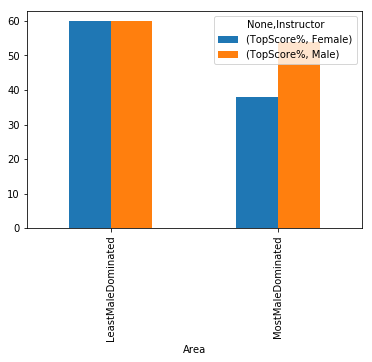

In [11]:
ten.unstack().plot(kind='bar');

As defaults go, that's not bad.  From this figure it is immediately clear that there is a substantial difference in scores between male and female instructors in male-dominated areas, and no difference in other areas.

The following function cleans up some of the details in the presentation.

In [12]:
def make_bar_plot(df):
    # make the plot (and set the rotation of the x-axis)
    df.unstack().plot(kind='bar', rot=0, alpha=0.7);
    
    # clean up the legend
    plt.gca().legend(['Female', 'Male'])
    
    # label the y axis
    plt.ylabel('Fraction of instructors getting top scores')
    
    # set limits on the 7-axis (in part to make room for the legend)
    plt.ylim([0, 75])

Here are the results for the 10-point scale.

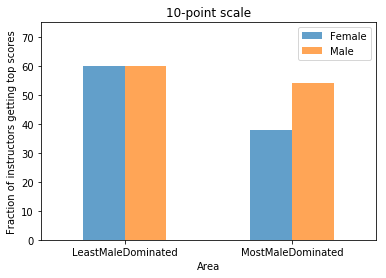

In [13]:
make_bar_plot(ten)
plt.title('10-point scale');

And here are the results for the six-point scale, which show clearly that the effect disappears when a 6-point scale is used (at least in this experiment).

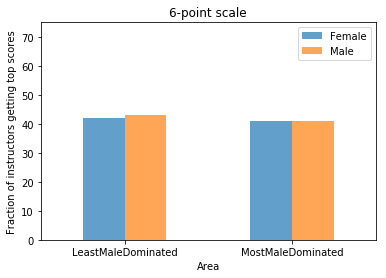

In [14]:
six = df.loc['6-point']
make_bar_plot(six)
plt.title('6-point scale');

Presenting two figures might be the best option, but in my challenge I asked for a single figure.

Here's a version that uses Pandas defaults with minimal customization.

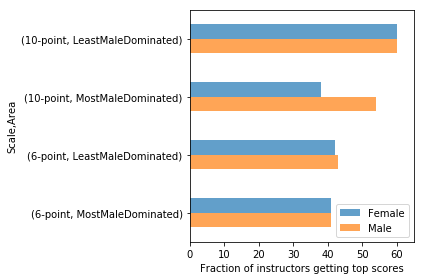

In [17]:
df.unstack().plot(kind='barh', xlim=[0, 65], alpha=0.7);
plt.gca().legend(['Female', 'Male'])
plt.gca().invert_yaxis()
plt.xlabel('Fraction of instructors getting top scores')

plt.tight_layout()
plt.savefig('gender_bias.png')

With a little tuning, this could be a good choice.  It clearly shows that there is only a substantial difference in one of the four conditions.